In [1]:
import pandas as pd
import numpy as np
import matplotlib
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import resample
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

dfProducts = pd.read_csv('amazon_products.csv')
dfCategories = pd.read_csv('amazon_categories.csv')

# pd.set_option('display.max_rows', 100)

# print(dfProducts.to_string())

with pd.option_context('display.max_rows', 200, 'display.max_columns', None):  # more options can be specified also
    display(dfCategories)

with pd.option_context('display.max_rows', 200, 'display.max_columns', None):  # more options can be specified also
    display(dfProducts)


,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies
...,...,...
243,262,"Xbox Series X & S Consoles, Games & Accessories"
244,263,PC Games & Accessories
245,264,Baby Girls' Clothing & Shoes
246,265,Boys' School Uniforms


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400
...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0


In [2]:
# Delete Useless Columns
dfProducts.drop(['asin', 'imgUrl', 'productURL', 'title'], axis=1, inplace=True) #removed title

# Map dfCategories onto dfProducts
dfProducts['category_id'] = dfProducts['category_id'].map(dfCategories.set_index('id')['category_name'])

# Rename column
dfProducts.rename(columns={"category_id": "category"}, inplace=True)

# Display the changed data
with pd.option_context('display.max_rows', 200, 'display.max_columns', 8):  # more options can be specified also
    display(dfProducts)
    
# dfProducts.to_csv('processedFile.csv')

,stars,reviews,price,listPrice,category,isBestSeller,boughtInLastMonth
0,4.5,0,139.99,0.00,Suitcases,False,2000
1,4.5,0,169.99,209.99,Suitcases,False,1000
2,4.6,0,365.49,429.99,Suitcases,False,300
3,4.6,0,291.59,354.37,Suitcases,False,400
4,4.5,0,174.99,309.99,Suitcases,False,400
...,...,...,...,...,...,...,...
1426332,4.2,0,14.95,0.00,Men's Accessories,False,0
1426333,4.4,0,33.99,0.00,Men's Accessories,False,0
1426334,3.6,0,8.54,0.00,Men's Accessories,False,0
1426335,4.5,0,54.36,57.39,Men's Accessories,False,0


In [3]:
# One Hot Encoding
categoryList = dfProducts['category']
# print(categoryList)
dum_df = pd.get_dummies(categoryList, columns=["category"])

dfProducts = dfProducts.join(dum_df)

# Delete category column
dfProducts.drop(['category'], axis=1, inplace=True)
display(dfProducts)
# dfProducts.to_csv('oneHotEncoding.csv')

,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,Abrasive & Finishing Products,Accessories & Supplies,Additive Manufacturing Products,Arts & Crafts Supplies,...,Women's Accessories,Women's Clothing,Women's Handbags,Women's Jewelry,Women's Shoes,Women's Watches,"Xbox 360 Games, Consoles & Accessories","Xbox One Games, Consoles & Accessories","Xbox Series X & S Consoles, Games & Accessories",eBook Readers & Accessories
0,4.5,0,139.99,0.00,False,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,169.99,209.99,False,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,0,365.49,429.99,False,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.6,0,291.59,354.37,False,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,174.99,309.99,False,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,4.2,0,14.95,0.00,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426333,4.4,0,33.99,0.00,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426334,3.6,0,8.54,0.00,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426335,4.5,0,54.36,57.39,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Upsampling
print('starting upsampling')
# Oversample data (class imbalance) (taken from Abdullah)
print(dfProducts['isBestSeller'].value_counts())
data_maj = dfProducts[dfProducts.isBestSeller == False]
data_min = dfProducts[dfProducts.isBestSeller == True]

data_min_upsampled = resample(data_min, replace = True, n_samples = 1417817)

dfProducts = pd.concat([data_maj, data_min_upsampled])
print(dfProducts['isBestSeller'].value_counts())
display(dfProducts)

starting upsampling
False    1417817
True        8520
Name: isBestSeller, dtype: int64
False    1417817
True     1417817
Name: isBestSeller, dtype: int64


,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,Abrasive & Finishing Products,Accessories & Supplies,Additive Manufacturing Products,Arts & Crafts Supplies,...,Women's Accessories,Women's Clothing,Women's Handbags,Women's Jewelry,Women's Shoes,Women's Watches,"Xbox 360 Games, Consoles & Accessories","Xbox One Games, Consoles & Accessories","Xbox Series X & S Consoles, Games & Accessories",eBook Readers & Accessories
0,4.5,0,139.99,0.00,False,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,169.99,209.99,False,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,0,365.49,429.99,False,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.6,0,291.59,354.37,False,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,174.99,309.99,False,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922347,4.6,0,12.99,0.00,True,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058360,4.6,4610,6.49,0.00,True,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779990,4.7,0,35.68,0.00,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001759,4.5,0,22.39,0.00,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Training
print('starting training')
X = dfProducts.drop('isBestSeller', axis = 1)
Y = dfProducts['isBestSeller']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

randForest = RandomForestClassifier()
randForest.fit(X_train, y_train)

starting training


RandomForestClassifier()

In [6]:
# Attempts at random search for hyperparameters + old KNN code from before
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}
# randForest = RandomForestClassifier()
# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(randForest, 
#                                  param_distributions = param_dist, 
#                                  n_iter=5, 
#                                  cv=5)
# rand_search.fit(X_train, y_train)
# Print the best hyperparameters
# print('Best hyperparameters:',  rand_search.best_params_)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)

starting prediction
Accuracy: 0.9967996586302539
Precision: 0.9936470711773044
Recall: 1.0


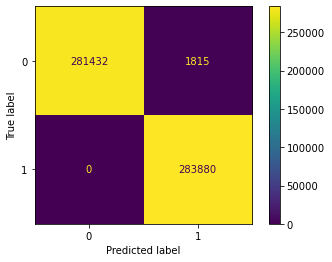

In [7]:
#Prediction/Testing
# y_pred = knn.predict(X_test)
print('starting prediction')
y_pred = randForest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
# feature_importances.plot.bar();

# with pd.option_context('display.max_rows', 200, 'display.max_columns', 8):  # more options can be specified also
#     display(dfProducts)

In [8]:
# Sources
# https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://www.ritchieng.com/machinelearning-one-hot-encoding/

# https://www.datacamp.com/tutorial/random-forests-classifier-python